# Assignment 3

### Content

Part 1 Review the Online Programming

Part 2 Finish the Solution Parse Part of Edit-Distance

Part 3 Change Loss Function to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$ 

Part 4 Q&A

### Part 1 Review the Online Programming

Gradient Descent Method part is reviewed and added in Assignment 2 

In [166]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 32]

In [167]:
from collections import defaultdict

In [168]:
price = defaultdict(int)

for i, p in enumerate(original_price):
    price[i + 1] = p

In [169]:
print(price)

defaultdict(<class 'int'>, {1: 1, 2: 5, 3: 8, 4: 9, 5: 10, 6: 17, 7: 17, 8: 20, 9: 24, 10: 30, 11: 32})


#### Get the Max Splitting by Enumerate

In [144]:
def example(f, arg):
    return f(arg)


def add_ten(num):
    return num + 10

def mul_ten(num):
    return num * 10

In [145]:
operations = [add_ten, mul_ten]

for t in operations:
    print(example(t, 100))

110
1000


In [146]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    print('function: {} called once!'.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [147]:
def some_fuction_1(): print('I am function 1')

In [148]:
get_call_times(some_fuction_1)

I am function 1
function: some_fuction_1 called once!


In [149]:
called_time

defaultdict(int, {'some_fuction_1': 1})

##### Decorator

In [150]:
from functools import wraps

In [151]:
called_time_with_arg = defaultdict(int)

def get_call_time(f):
    "@param f is a function"
    @wraps(f)
    def wrap(n):
        "Hehe I'm wrap"
        print('Try try')
        result = f(n)
        called_time_with_arg[(f.__name__, n)] += 1
        return result
    return wrap

In [152]:
add_ten = get_call_time(add_ten)

In [153]:
add_ten(10)

Try try


20

In [154]:
"""
the following codes have the same function
 with "add_twenty = get_call_time(add_twenty)"
""" 
@get_call_time
def add_twenty(n):
    return n + 20

In [155]:
add_twenty(10)

Try try


30

In [156]:
add_twenty = get_call_time(add_twenty)

In [157]:
add_twenty(10)

Try try
Try try


30

In [158]:
called_time_with_arg

defaultdict(int, {('add_ten', 10): 1, ('add_twenty', 10): 3})

#### Dynamic Programming 

+ 1. Overlapping Subproblems
+ 2. Overlapping computing saved in a table
+ 3. Parse solution

In [159]:
# 对于已经划分好的值进行记录
def memo(f):
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in memo.already_computed:
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
            
        return result
    return _wrap

In [184]:
solution = {}
called_time_with_arg = defaultdict(int)
@memo
def r(n):
    """
    args: n is the iron length
    return: the maximum revenue
    """
    fname = r.__name__
    call_time_with_arg
    
    max_price, max_split = max(
    [(price[n], 0)] + [(r(i)  + r(n-i), i) for i in range(1, n)], key = lambda x: x[0]
    )
    
    solution[n] = (n - max_split, max_split)
    
    return max_price

In [185]:
r(34)

100

In [186]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (10, 2),
 13: (10, 3),
 14: (12, 2),
 15: (13, 2),
 16: (10, 6),
 17: (11, 6),
 18: (16, 2),
 19: (16, 3),
 20: (10, 10),
 21: (11, 10),
 22: (20, 2),
 23: (20, 3),
 24: (22, 2),
 25: (23, 2),
 26: (20, 6),
 27: (21, 6),
 28: (26, 2),
 29: (26, 3),
 30: (20, 10),
 31: (21, 10),
 32: (30, 2),
 33: (30, 3),
 34: (32, 2)}

In [187]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return[left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [188]:
r(19)

55

In [192]:
parse_solution(25)

[10, 10, 3, 2]

#### Edit Distance 

In [265]:
solution = {}

In [266]:
from functools import lru_cache

In [267]:
@lru_cache(maxsize = 2 ** 10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
        
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))
    
    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation
    
    return min_distance

In [268]:
edit_distance('ABCDE', 'ABCCFG')

3

In [269]:
edit_distance('Beijing','beijink')

2

In [323]:
edit_distance('be','bc')

1

In [504]:
edit_distance('我真好看','我怎么这么好看')

4

In [505]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCF'): 'ADD F',
 ('A', 'ABCCFG'): 'ADD G',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCF'): 'ADD F',
 ('AB', 'ABCCFG'): 'ADD G',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCF'): 'ADD F',
 ('ABC', 'ABCCFG'): 'ADD G',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCF'): 'ADD F',
 ('ABCD', 'ABCCFG'): 'ADD G',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCF'): 'SUB E => F',
 ('ABCDE', 'ABCCFG'): 'ADD G',
 ('B', 'b'): 'SUB B => b',
 ('B', 'be'): 'ADD e',
 ('B', 'bei'): 'ADD i',
 ('B', 'beij'): 'ADD j',
 ('B', 'beiji'): 'ADD i',
 ('B', 'beijin'): 'ADD n',
 ('B', 'beijink'): 'ADD k',
 ('Be', 'b'): 'DEL e',
 ('Be',

### Part 2 Finish the Solution Parse Part of Edit-Distance

In [506]:
def parse_distance(string1, string2, ed_solution):

    operation = ed_solution[string1, string2]
    
    if len(string1)==1 and len(string2)==1: return vacant(operation)
    
    if (operation.split()[0] if operation != '' else operation) == 'DEL':
        
        return parse_distance(string1[:-1], string2, ed_solution) + [operation]
    
    elif (operation.split()[0] if operation != '' else operation) == 'ADD':
        
        return parse_distance(string1, string2[:-1], ed_solution) + [operation]
    
    else:
        
        return parse_distance(string1[:-1], string2[:-1], ed_solution) + vacant(operation)
    
def vacant(value):
    
    if value=='':return [] 
    else: return [value]

In [507]:
parse_distance('AB', 'ABCCF', ed_solution=solution)

['ADD C', 'ADD C', 'ADD F']

In [508]:
parse_distance('B', 'beijin', ed_solution=solution)

['SUB B => b', 'ADD e', 'ADD i', 'ADD j', 'ADD i', 'ADD n']

In [509]:
parse_distance('Beijing', 'be', solution)

['SUB B => b', 'DEL i', 'DEL j', 'DEL i', 'DEL n', 'DEL g']

In [510]:
parse_distance('b', 'bc', solution)

['ADD c']

In [511]:
parse_distance('我真好看', '我怎么这么', solution)

['SUB 真 => 怎', 'SUB 好 => 么', 'SUB 看 => 这', 'ADD 么']

### Part 3 Change Loss Function to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$ 
Try to get the right partial formual and implement the gradient descent code.

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n} \sum{\frac{|y_i - (kx_i+b)|}{y_i - (kx_i + b)}x_i} $$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{1}{n} \sum{\frac{|y_i - (kx_i+b)|}{y_i - (kx_i + b)}} $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n} \sum{\frac{|y_i - \hat{y_i}|}{y_i - \hat{y_i}}x_i} $$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{1}{n} \sum{\frac{|y_i - \hat{y_i}|}{y_i - \hat{y_i}}} $$

In [550]:
from sklearn.datasets import load_boston

In [551]:
import random

In [568]:
data = load_boston()
x,y = data['data'], data['target']
x_rm = x[:, 5]

In [569]:
def price(rm, k, b):
    # f(x) = k*x + b
    return k * rm + b

In [737]:
def loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))
#     return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [670]:
def partial_k(x, y, y_hat):
    n = len(y)
    
    gradient_k = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i - y_hat_i == 0: continue
        gradient_k += abs(y_i - y_hat_i)/(y_i - y_hat_i) * x_i
        
    return -1 / n * gradient_k

def partial_b(x, y, y_hat):
    n = len(y)
    
    gradient_b = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i - y_hat_i == 0: continue
        gradient_b += abs(y_i - y_hat_i)/(y_i - y_hat_i)
        
    return -1 / n * gradient_b

In [718]:
try_times = 2000

min_loss_gd = float('inf')

k_best_gd = random.random()*200-100 
b_best_gd = random.random()*200-100

learning_rate = 1e-02

update_time = 0

for i in range(try_times):
    
    price_by_k_b_gd = [price(t, k_best_gd, b_best_gd) for t in x_rm]
    
    current_loss = loss(y, price_by_k_b_gd)
    
    if current_loss < min_loss_gd:
        min_loss_gd = current_loss
        update_time += 1
        if update_time % 50 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, k_best_gd, b_best_gd, min_loss_gd))
    
    k_gradient = partial_k(x_rm, y, price_by_k_b_gd)
    
    b_gradient = partial_b(x_rm, y, price_by_k_b_gd)
    
    k_best_gd = k_best_gd + (-1 * k_gradient) * learning_rate
    
    b_best_gd = b_best_gd + (-1 * b_gradient) * learning_rate

When time is : 49, get best_k: 74.4268500374851 best_b: -83.53692740404452, and the loss is: 361.6758073596982
When time is : 99, get best_k: 71.28453284380926 best_b: -84.03692740404477, and the loss is: 341.4274926683555
When time is : 149, get best_k: 68.14221565013342 best_b: -84.53692740404503, and the loss is: 321.1791779770135
When time is : 199, get best_k: 64.99989845645759 best_b: -85.03692740404529, and the loss is: 300.93086328567125
When time is : 249, get best_k: 61.85758126278175 best_b: -85.53692740404554, and the loss is: 280.6825485943294
When time is : 299, get best_k: 58.71526406910591 best_b: -86.0369274040458, and the loss is: 260.43423390298676
When time is : 349, get best_k: 55.57294687543008 best_b: -86.53692740404605, and the loss is: 240.1859192116446
When time is : 399, get best_k: 52.43062968175424 best_b: -87.03692740404631, and the loss is: 219.93760452030247
When time is : 449, get best_k: 49.288312488078404 best_b: -87.53692740404657, and the loss is: 1

In [684]:
import matplotlib.pyplot as plt

In [558]:
def draw_rm_and_price():
    plt.scatter(x[:,5],y)

In [559]:
%matplotlib inline

6.292492573122532


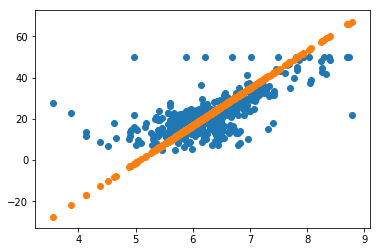

In [740]:
k = 18.106
b = -91.812

y_test = [price(t,k,b) for t in x_rm]
print(loss(y, y_test))

draw_rm_and_price()
plt.scatter(x_rm, y_test)

通过多次尝试发现，相对于$loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$，换成 $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$后，结果并不理想。尝试分析原因：
1. 相对于绝对值，平方可以将差异放大，在确定搜索方向时可以更准确
2. 平方受初值影响更小，相对的，初值对于绝对值loss的搜索方向影响很大
3. 两个loss方程在learning rate的选择上也不同

### Part 4 Q&A

Review
1. **Why do we use Derivative / Gredient to fit a target function?** <br>
Ans: <br>
2. **In the words 'Gredient Descent', what's the Gredient and what's the Descent?**<br>
Ans: <br>
3. **What's the advantages of the 3rd gradient descent method compared to the previous methods?**<br>
Ans: <br>
4. **Using the simple words to describe: What's the machine leanring.**<br>
Ans: <br>

New
1. **Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search methods?**<br>
Ans: <br>
Because it can use the past knowledge to make solving a future problem easier. With Dynamic Programming, the results can be stored in some sort of tables, and when you want to answer a question, you can refer to the table if the answer is already known or part of it is known, which help sving a lot of time. And those previous approaches will treat it as a new problem even if the answer has already got before.
2. **Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?**<br>
Ans: <br>
(1) Dynamic Programming can be applied in the reinforcement learning of Machine Learning. It's suitable for applications where decision processes are critical in a highly uncertain environment.<br>
(2) Under some situations, it's extremely hard to exstract a function from the question, which has too many unknown elements. However, DP could be better applied under this circumstance.
3. **Can you catch up at least 3 problems which could solved by Dynamic Programming?**<br>
Ans: <br>
(1) Google maps, find the shortest path<br>
(2) Search engines<br>
(3) Reservoir water resources allocation<br>
4. **Can you catch up at least 3 problems wich could sloved by Edit Distance?**
Ans: <br>
(1)Paper  copy detection<br>(2) automatic spelling correction<br> (3) RNA folding<br>
5. **Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.**<br>
Ans: <br>
(1) Problem can be divided into  stages with a decision required at each stage.
<br>(2) Each stage has a number of states associated with it.<br> (3) The decision chosen at any stage describes how the state at current stage is transformed into the state at the next stage(possibly according to a probability distribution)<br>(4) Given the current state, the optimal decision for the remaining stages is independent of the policy decisions adopted in previous stages.<br> (5) If the states for the problem are classified into N stages, there must be a recursion that relates the cost/reward during stages n, n+1,...,N to the cost/reward during stages n+1, n+2,...N.
6. **What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)**<br>
Ans: <br>
(1) Multiple function calls are expensive<br>
(2) Inefficient when there is a lot of braches from one state.<br>
(3) Requires large amount of space as the each function state needs to be stored on system stack.<br>